In [2]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
data = np.array([[ 1.2, 0.7],
                 [ 0.0,-2.0],
                 [-0.3,-0.5],
                 [ 3.0, 0.1],
                 [-0.1,-1.0],
                 [-0.0, 1.1],
                 [ 2.1,-1.3],
                 [ 4.0, 1.0],
                 [ 3.1,-1.8],
                 [ 1.1,-0.1],
                 [ 1.5,-2.2],
                 [ 4.0,-1.0],
                 [-1.0, 2.0],
                 [ 2.0,1.0]])

labels = np.array([  1,
                     3,
                     2,
                     1,
                     2,
                     2,
                     1,
                     3,
                     2,
                     1,
                     2,
                     2,
                     3,
                     3])

In [4]:
def plot_data(data, labels):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.scatter(data[:,0], data[:,1], c=labels, s=50,  cmap=plt.cm.Set3 ,zorder=50)
    nudge = 0.08
    for i, (X,Y) in enumerate(data):
        ax.annotate(f'{i}',(X+nudge,Y+nudge))
    ax.set_aspect('equal', 'datalim')
    plt.show()
    
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def convert_label(label):
    vec = np.zeros((3,1))
    vec[label-1]=1
    return vec


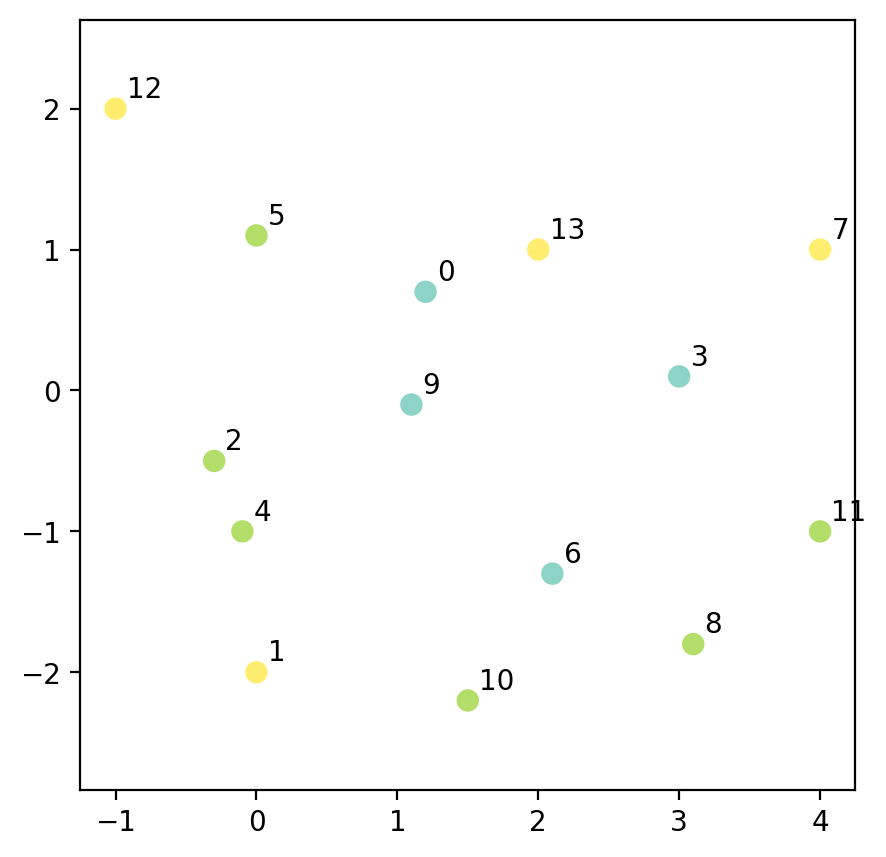

In [5]:
plot_data(data, labels)

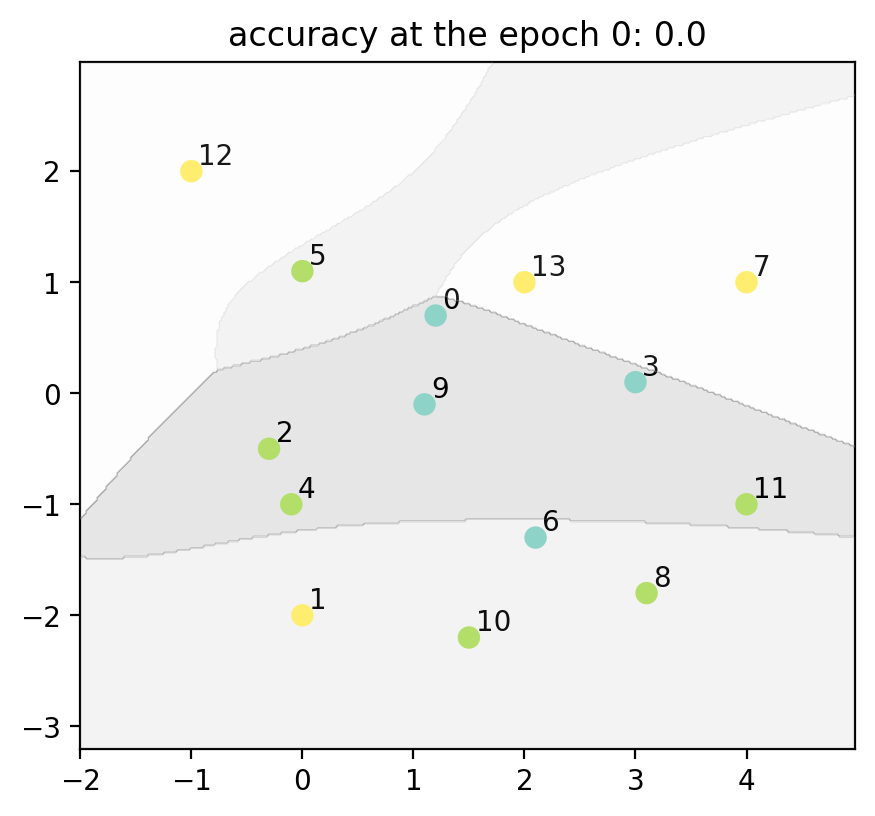

accuracy: 0.0%, total cost: 12.6613


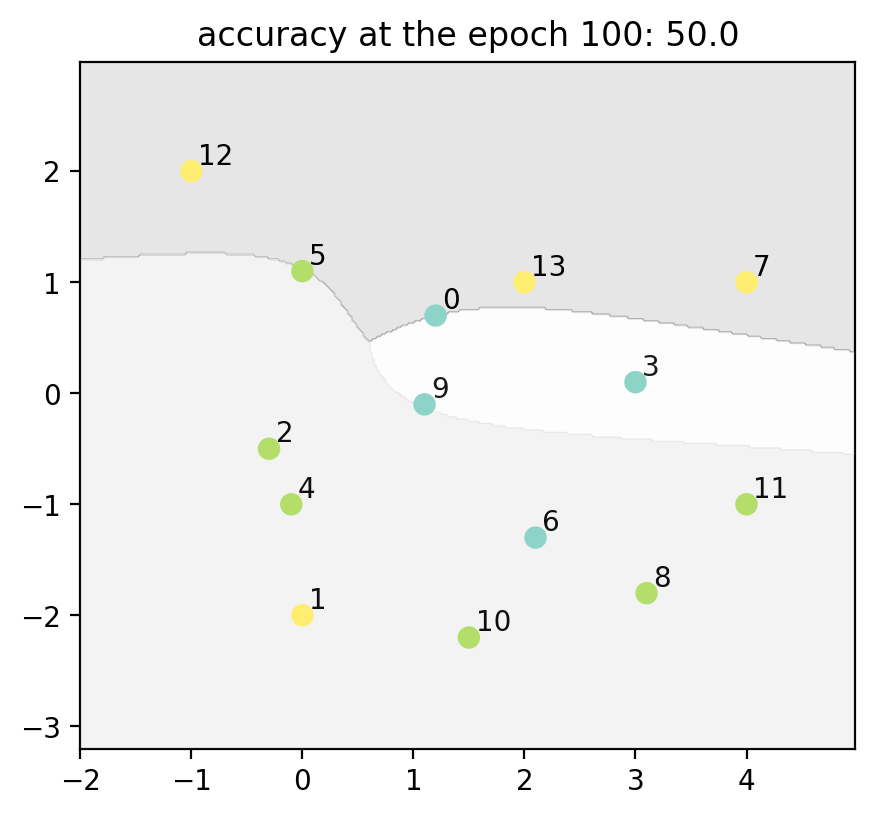

accuracy: 50.0%, total cost: 6.8043


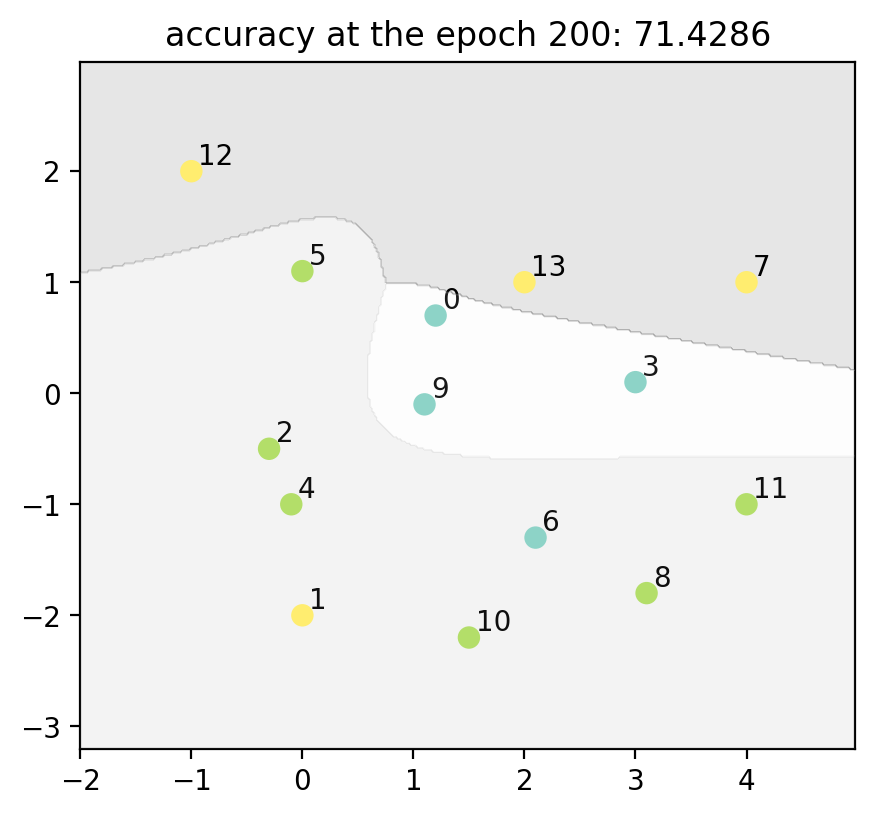

accuracy: 71.4286%, total cost: 5.2141


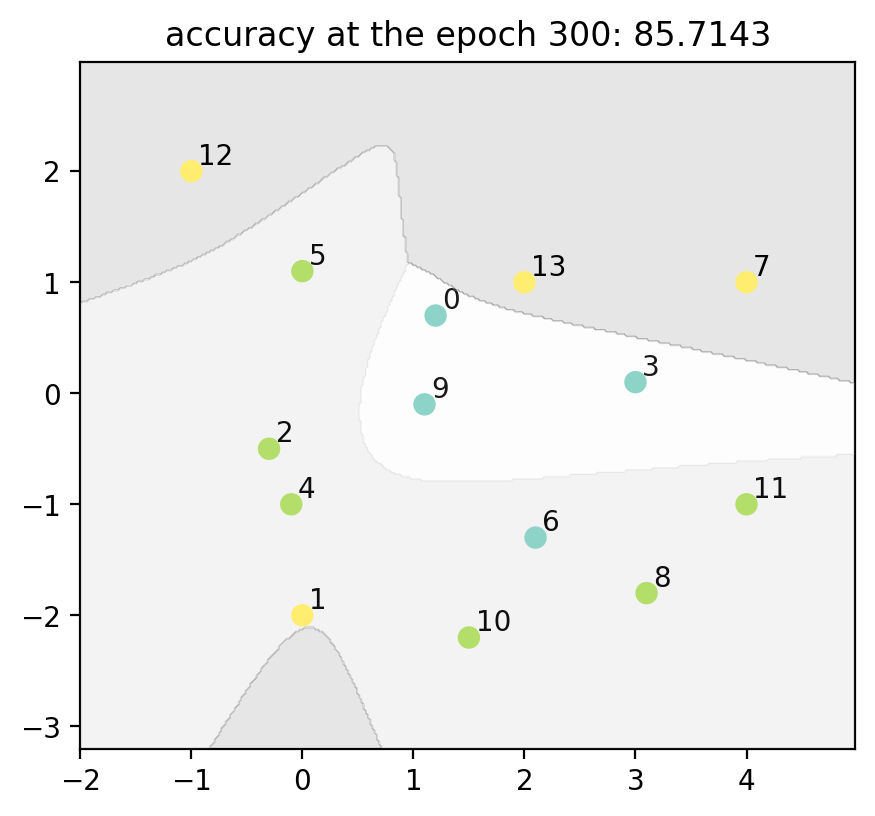

accuracy: 85.7143%, total cost: 3.4513


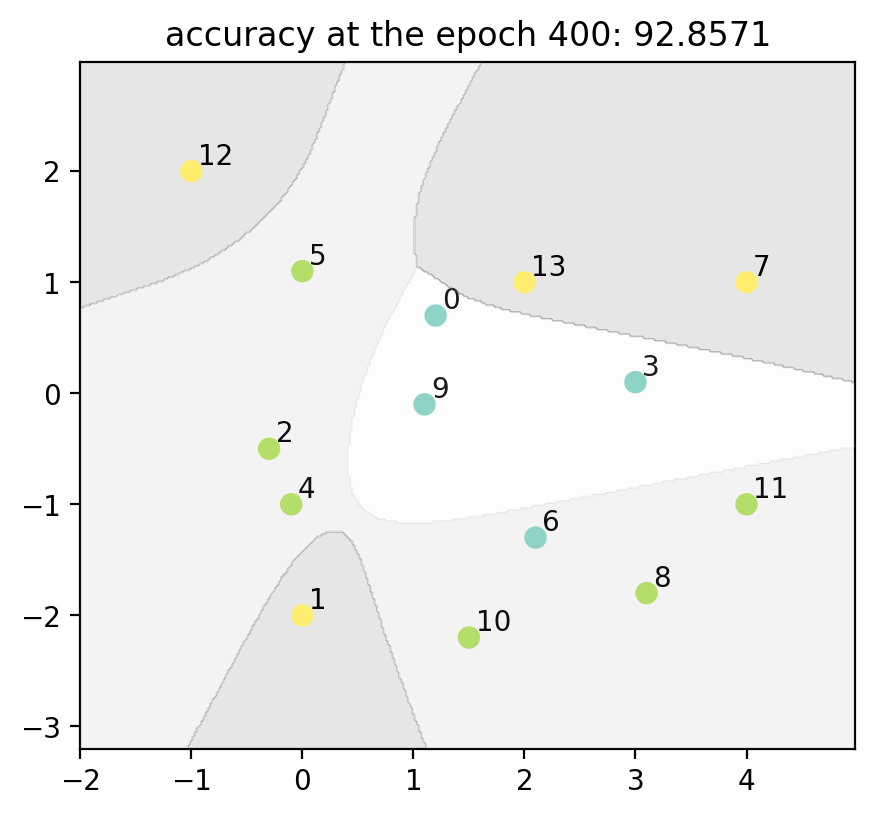

accuracy: 92.8571%, total cost: 2.2845


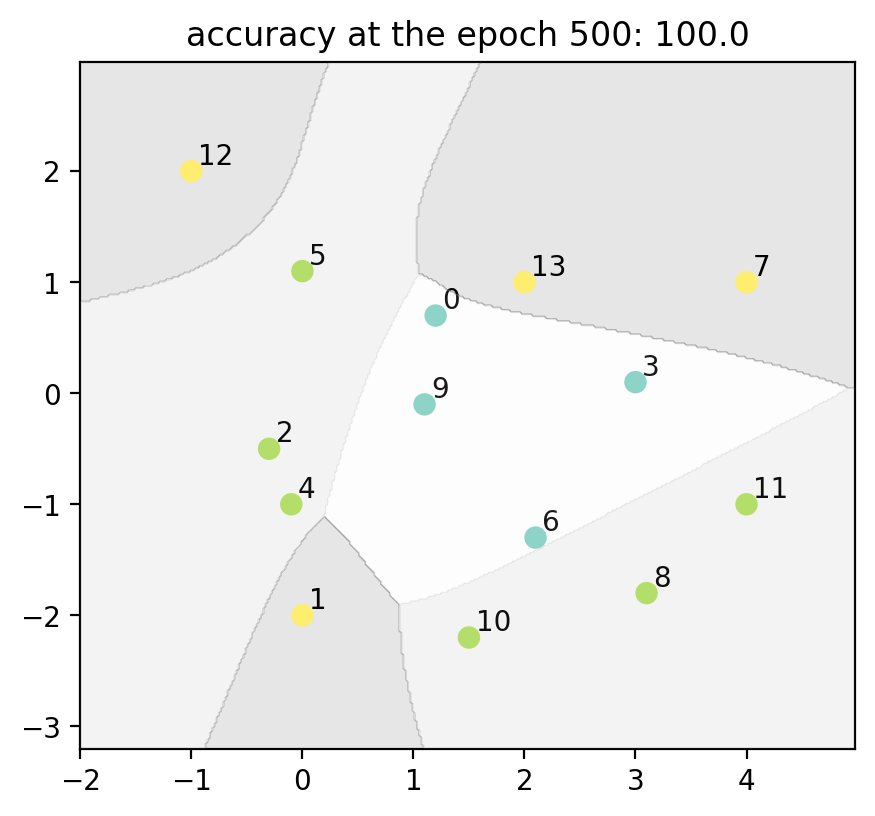

accuracy: 100.0%, total cost: 1.2633


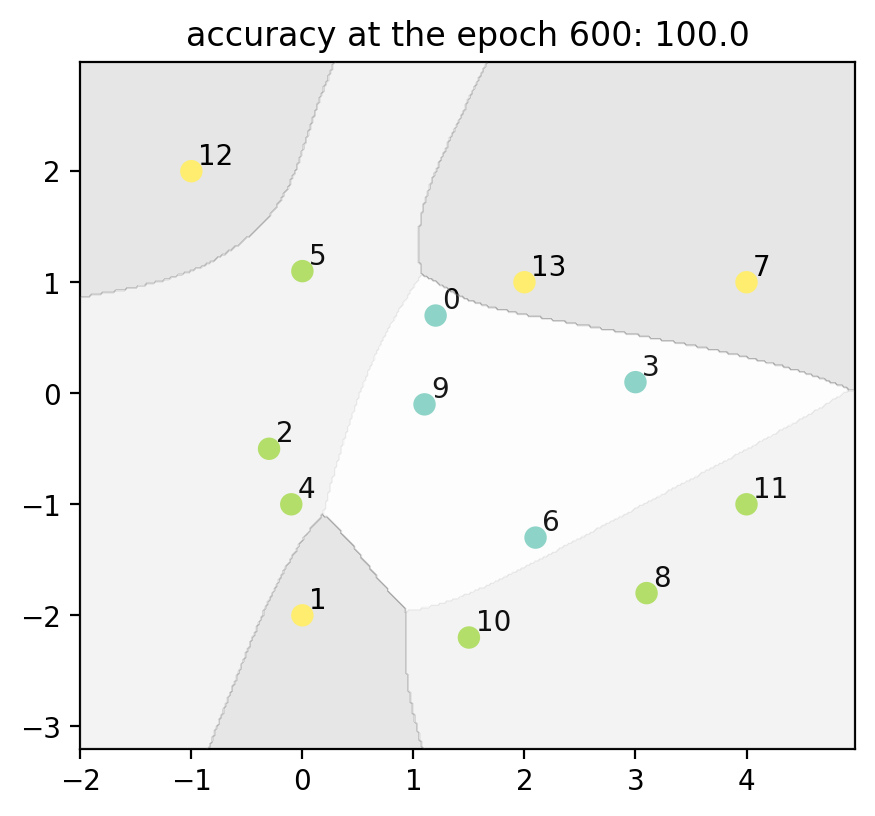

accuracy: 100.0%, total cost: 0.7259


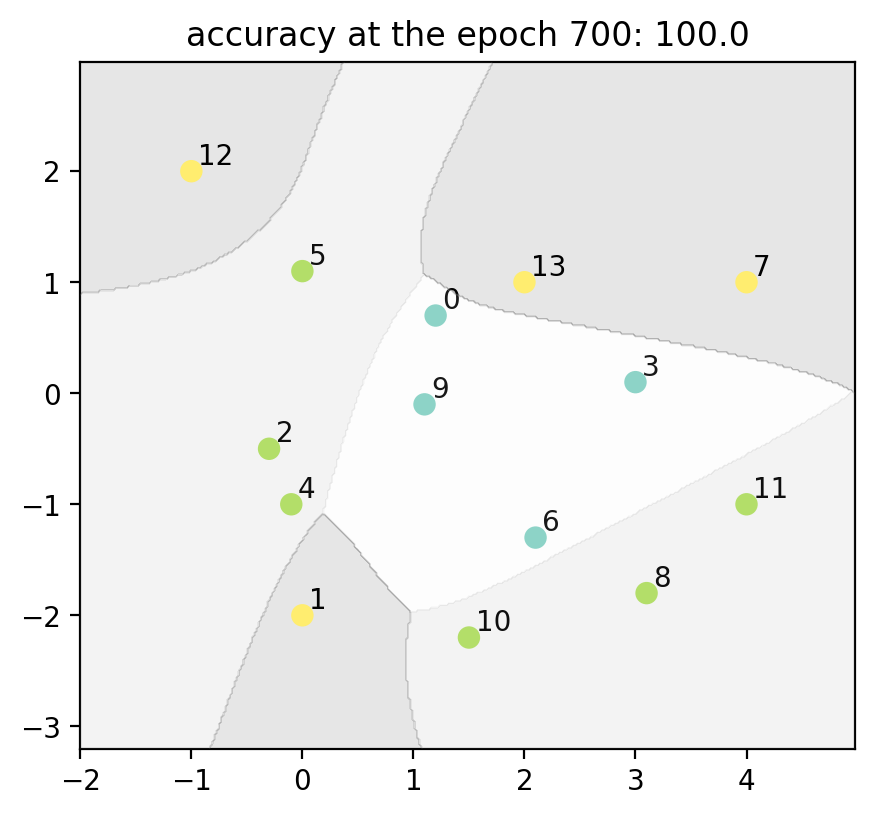

accuracy: 100.0%, total cost: 0.4489


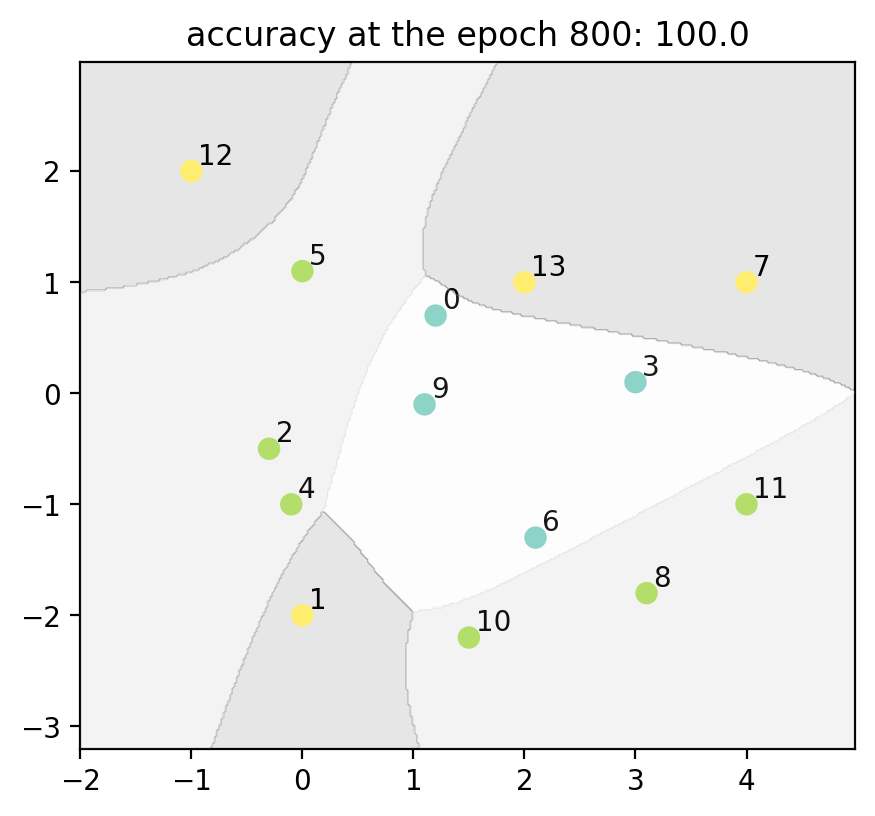

accuracy: 100.0%, total cost: 0.3018


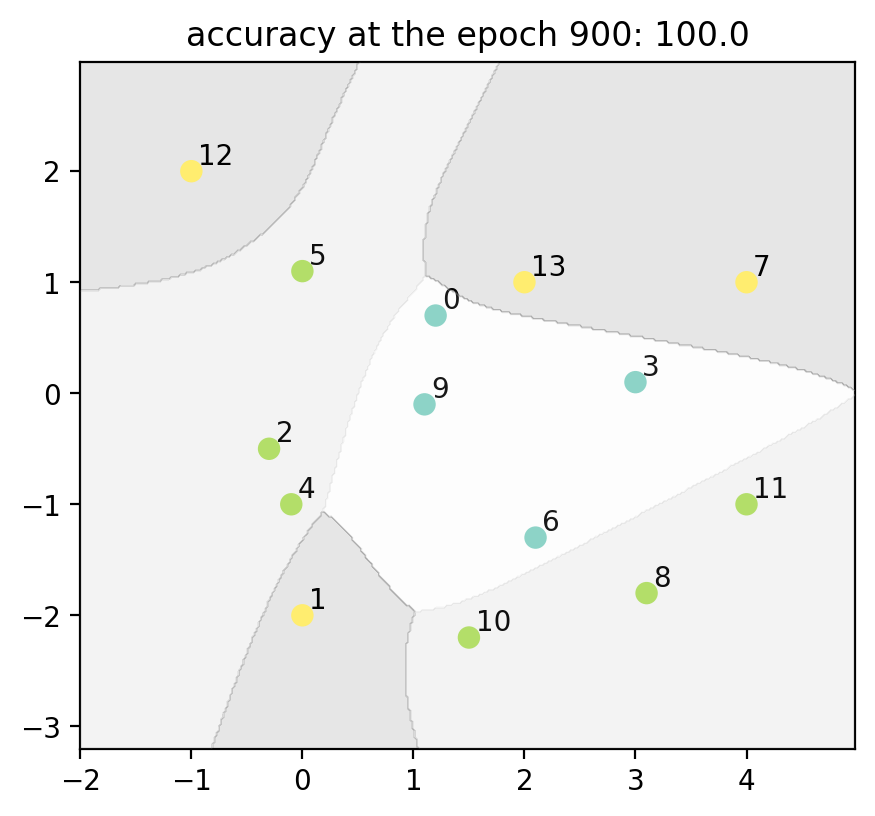

accuracy: 100.0%, total cost: 0.2184


In [18]:
# We can change the central two sizes, in order to find the most 
# efficient algorithm.
sizes = [2, 5, 8, 3]

step_size = 1
datalen = len(data)
no_layers = len(sizes)

grid = create_meshgrid(data)

biases = [np.random.randn(a, 1) for a in sizes[1:]]
weights = [np.random.randn(a, b) for a, b in zip(sizes[1:], sizes[:-1])]
d_biases = [np.zeros(b.shape) for b in biases]
d_weights = [np.zeros(w.shape) for w in weights]

for epoch in range(1000):
    TC = 0
    dd_biases = [np.zeros(b.shape) for b in biases]
    dd_weights = [np.zeros(w.shape) for w in weights]
    for d, l in zip(data, labels):
        # index = np.random.randint(datalen)
        # a = data[index].reshape(2, 1)
        a = d.reshape(2, 1)
        # y = convert_label(labels[index])
        y = convert_label(l)
        activations = [a]
        weighted_sums = []
        # forward pass:
        for W, b in zip(weights, biases):
            z = np.dot(W, a) + b
            weighted_sums.append(z)
            a = sigmoid(z)
            activations.append(a)
        # cost/loss:
        C = np.sum((activations[-1] - y)**2)
        TC += C
        # backward pass:
        dC = 2*(activations[-1] - y)
        delta = dC*activations[-1]*(1 - activations[-1])
        d_biases[-1] = delta
        d_weights[-1] = np.dot(delta, activations[-2].T)
        for i in range(2, no_layers):
            delta = activations[-i]*(1 - activations[-i])*np.dot(weights[-i + 1].T, delta)
            d_biases[-i] = delta 
            d_weights[-i] = np.dot(delta, activations[-i - 1].T)
        dd_weights = [ddw + dw for ddw, dw in zip(dd_weights, d_weights)]
        dd_biases = [ddb + db for ddb, db in zip(dd_biases, d_biases)]
    # updating weights and biases:    
    dd_weights = [w/datalen for w in dd_weights]     
    dd_biases = [b/datalen for b in dd_biases]     
    
    weights = [w - dw*step_size for w, dw in zip(weights, dd_weights)]
    biases = [b - db*step_size for b, db in zip(biases, dd_biases)]

    if (epoch%100 == 0):
        acc = evaluate_accuracy()
        acc = np.round(acc*100, 4)
        plot_neural_simple(weights, biases, grid, data, labels, epoch, acc)
        print(f'accuracy: {acc}%, total cost: {np.round(TC, 4)}')        

In [7]:
def evaluate_accuracy():
    num_correct = 0
    for d, l in zip(data, labels):
        a = d.reshape(2, 1)
        y = convert_label(l)
        for W, b in zip(weights, biases):
            a = sigmoid(np.dot(W, a) + b)
        prediction = np.rint(a)
        if np.array_equal(prediction, y):
            num_correct += 1
    return num_correct/datalen

In [8]:
def create_meshgrid(data):
    h = 0.02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return (xx,yy,np.ones(xx.shape))

def plot_neural_simple(weights, biases, grid, data, labels, epoch, accuracy):
    nudge = 0.06
    xx,yy,Z = grid
    
    for i in range(xx.shape[0]): # row
        for j in range(yy.shape[1]): #column
            a = np.array([xx[i][j], yy[i][j]]).reshape(2,1)
            for W, b in zip(weights, biases):
                a = sigmoid(np.dot(W, a) + b)
            score = np.argmax(a)    
            Z[i][j] = score
            
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    plt.title(f'accuracy at the epoch {epoch}: {accuracy}')
    ax.contourf(xx, yy, Z, cmap=plt.cm.binary, alpha=0.1, zorder=15)
    ax.scatter(data[:, 0], data[:, 1], c=labels, s=50,  cmap=plt.cm.Set3,zorder=50)
    ax.set_aspect('equal')
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()